In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
df = pd.read_csv("C:/DataScience/DataScience/Datasets/games.csv")

In [63]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [64]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [65]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [66]:
#agrupa as aberturas e ordena pelas mais jogadas
aberturas = df['opening_name'].value_counts(ascending=False)
aberturas


opening_name
Van't Kruijs Opening                                                  368
Sicilian Defense                                                      358
Sicilian Defense: Bowdler Attack                                      296
French Defense: Knight Variation                                      271
Scotch Game                                                           271
                                                                     ... 
Slav Defense: Two Knights Attack                                        1
Sicilian Defense: Richter-Rauzer Variation |  Vitolins Variation        1
Queen's Gambit Declined: Exchange Variation |  Reshevsky Variation      1
Neo-Gruenfeld Defense: Classical Variation |  Polgar Variation          1
Slav Defense: Diemer Gambit                                             1
Name: count, Length: 1477, dtype: int64

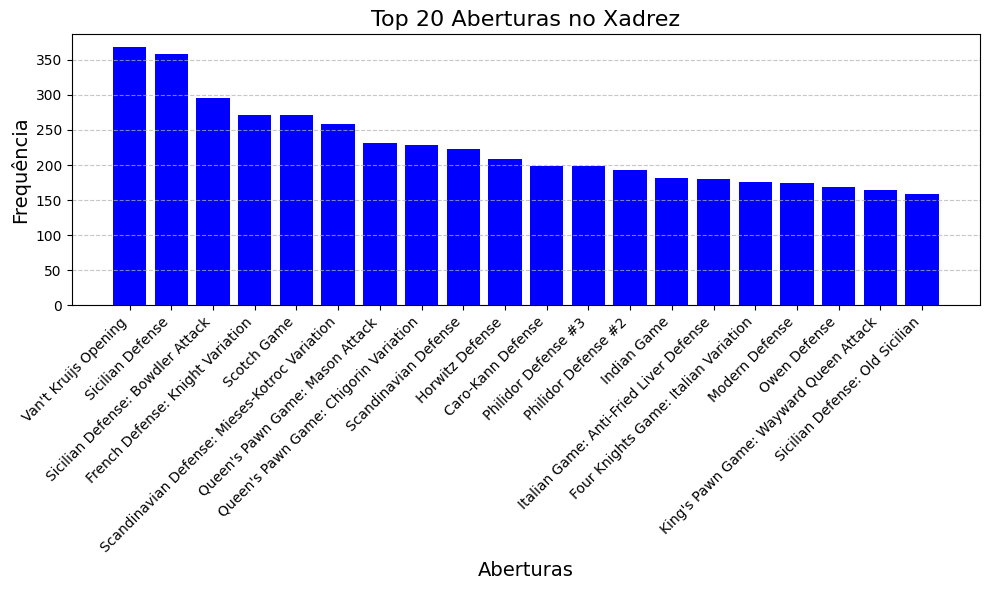

In [67]:
# Selecionar as 20 maiores frequências
top_20_aberturas = aberturas.nlargest(20)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(top_20_aberturas.index, top_20_aberturas.values, color='blue')

# Personalizar o gráfico
plt.title('Top 20 Aberturas no Xadrez', fontsize=16)
plt.xlabel('Aberturas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes das aberturas para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


C:\Users\Tiago\AppData\Local\Temp\ipykernel_10936\107539393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vencedores.index, y=vencedores.values, palette='viridis')


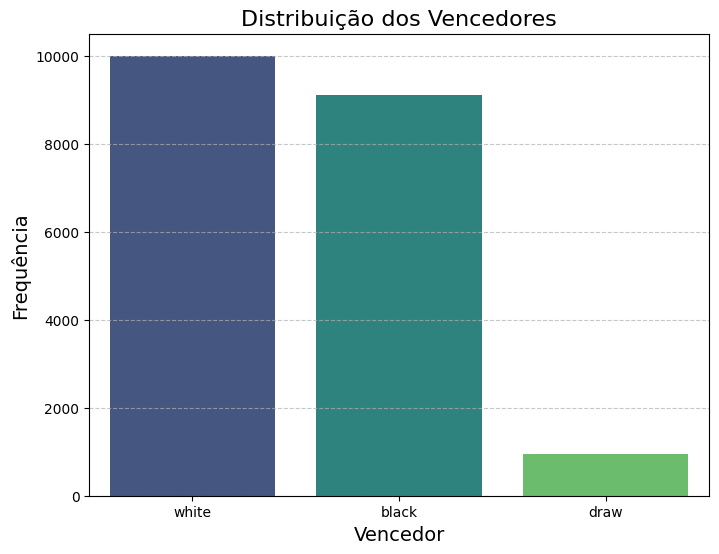

In [68]:
vencedores = df['winner'].value_counts()

# Gráfico 1: Frequência de Vencedores
plt.figure(figsize=(8, 6))
sns.barplot(x=vencedores.index, y=vencedores.values, palette='viridis')
plt.title('Distribuição dos Vencedores', fontsize=16)
plt.xlabel('Vencedor', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [69]:
# 10 maiores partidas por turnos
maiores = df.nlargest(10, 'turns')
maiores

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11554,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13
13859,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13
16386,cZiGllu7,True,1.481753e+12,1.481755e+12,259,draw,draw,15+5,aragon26,1441,lone-wolf,1461,d4 d5 c4 c6 Nc3 Nf6 Bg5 Nbd7 Qc2 Qb6 e3 h6 Bf4...,D10,Slav Defense #2,5
4236,vQq60Hur,True,1.474480e+12,1.474490e+12,255,draw,draw,7+2,manipin,1585,kasparovd0311,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,C00,French Defense: Queen's Knight,3
16645,5ZjOnwjl,True,1.480271e+12,1.480272e+12,226,draw,draw,10+0,chunnev,1817,jhonthoth,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,C00,French Defense: Knight Variation,3
15478,zdy2Ki2X,True,1.492978e+12,1.492979e+12,222,draw,draw,10+0,die_uhr,1851,hudsonchess,1853,d4 d6 e4 e5 dxe5 dxe5 Qxd8+ Kxd8 Nf3 Nc6 Bb5 B...,B07,King's Pawn Game: Maroczy Defense,4
16943,p4a3ZFBE,True,1.488301e+12,1.488303e+12,222,mate,black,9+5,khelil,1617,sedik,1614,e4 d6 Bc4 f5 d3 Nf6 Bg5 fxe4 dxe4 Nxe4 Qf3 Nxg...,B07,Pirc Defense #4,2
6776,wyaK4EdL,True,1.472640e+12,1.472640e+12,221,draw,draw,15+10,fantasticthinking,2111,sergeypolozhiev,2044,e4 e5 Nf3 Nc6 Bc4 Bc5 O-O d6 c3 Qf6 d3 h6 Be3 ...,C50,Giuoco Piano,6
13230,fO4nroL9,True,1.504272e+12,1.504273e+12,218,resign,black,8+3,fiko42,1632,gesoo,1715,e4 e6 c3 d5 e5 c5 d4 Nc6 Nf3 Qb6 b3 Nge7 Ng5 c...,C02,French Defense: Advance Variation | Paulsen A...,9
13555,ZVzhtO1f,True,1.504456e+12,1.504457e+12,216,draw,draw,8+0,zih07,2393,jerusseust,2438,d4 Nf6 c4 e6 Nc3 d5 e3 Nc6 cxd5 exd5 Bd3 Be7 N...,D35,Queen's Gambit Declined: Normal Defense,6


C:\Users\Tiago\AppData\Local\Temp\ipykernel_10936\3317785776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=motivo.index, y=motivo.values, palette='coolwarm')


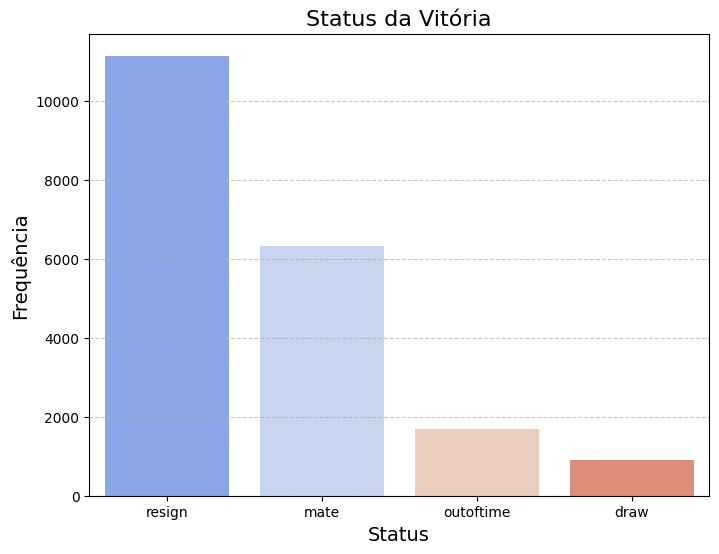

In [72]:
motivo =df['victory_status'].value_counts()


# Gráfico 2: Status da Vitória
plt.figure(figsize=(8, 6))
sns.barplot(x=motivo.index, y=motivo.values, palette='coolwarm')
plt.title('Status da Vitória', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Tiago\AppData\Local\Temp\ipykernel_10936\3579064072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primeiroMovimento.head(10).index, y=primeiroMovimento.head(10).values, palette='Blues_r')


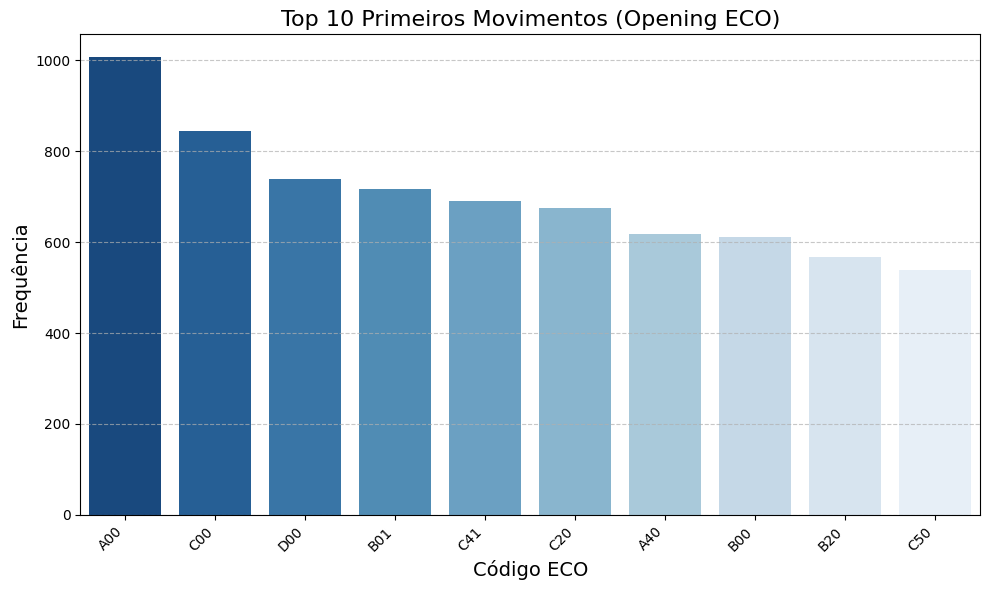

In [73]:
#Primeiros movimentos
primeiroMovimento = df['opening_eco'].value_counts(ascending=False)

# Gráfico 3: Primeiros Movimentos (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=primeiroMovimento.head(10).index, y=primeiroMovimento.head(10).values, palette='Blues_r')
plt.title('Top 10 Primeiros Movimentos (Opening ECO)', fontsize=16)
plt.xlabel('Código ECO', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()